In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/Abdelrahman_work/prj_#2_text_classification/test_in_kag_org.csv')
train = pd.read_csv('/content/drive/MyDrive/Abdelrahman_work/prj_#2_text_classification/train_aug_in_kag_org.csv')
train.dropna(inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34911 entries, 0 to 34952
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       34911 non-null  object
 1   text        34911 non-null  object
 2   title_text  34911 non-null  object
 3   label       34911 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
# Factorizing the label column in the train and test dataframes:
train['label_id']=train['label'].factorize()[0]
test['label_id']=test['label'].factorize()[0]
labels = train[['label','label_id']].drop_duplicates()
for row in labels['label']:
  test.loc[test['label'] == row, 'label_id'] = int(labels.loc[labels['label'] == row, 'label_id'])
  #print(row)

display(train[['label','label_id']].drop_duplicates())
display(test[['label','label_id']].drop_duplicates())

# Splitting the dataframes into X and y:
X_test, y_test = test[['title','text','title_text']], test['label_id']
X_train, y_train = train[['title','text','title_text']], train['label_id']
X_train.info()

,label,label_id
0,payment-credit-card-balance-euro-dollars-credi...,0
5799,api-code-technical-gear-parameters-setup-config,1
11580,hospital-health-safety-doctor-nurse-medicine-m...,2
17214,edit-paint-art-palette-lightbulb-idea-image,3
22089,restaurant-food-eat-eating people-water-drink,4
24250,education,5
26103,beauty-fashion-makeup-women,6
27905,travel-hospitality,7
29703,building-appartment-house-block-construction-k...,8
31382,legal,9


,label,label_id
0,send-share-notification,13
1,building-appartment-house-block-construction-k...,8
2,api-code-technical-gear-parameters-setup-config,1
6,payment-credit-card-balance-euro-dollars-credi...,0
12,business-startup-offices-work station-desk-work,11
16,user-profile-community-groups,14
18,edit-paint-art-palette-lightbulb-idea-image,3
56,call-phone-smartphone-android-apple-conference...,12
288,hospital-health-safety-doctor-nurse-medicine-m...,2
299,education,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34911 entries, 0 to 34952
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       34911 non-null  object
 1   text        34911 non-null  object
 2   title_text  34911 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


# Cleaning the text using Regular Expressions (re), and Natural Language Toolkit (nltk):

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Compiling regular expression patterns into a regular expression objects:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

# Applying the clean_text function to the dataframe:
def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace('x', '') # Remove the XXXX values
    text = REMOVE_NUM.sub('', text)
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#X_train['title'] = X_train['title'].apply(str)
#X_train['text'] = X_train['text'].apply(str)
#X_train['title_text'] = X_train['title_text'].apply(str)
X_train['title'] = X_train['title'].apply(clean_text)
X_train['text'] = X_train['text'].apply(clean_text)
X_train['title_text'] = X_train['title_text'].apply(clean_text)
X_test['title'] = X_test['title'].apply(clean_text)
X_test['text'] = X_test['text'].apply(clean_text)
X_test['title_text'] = X_test['title_text'].apply(clean_text)
display(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,title,text,title_text
0,squirrel financial wellbeing,squirrel account makes easy stick budget save ...,squirrel financial wellbeing squirrel account ...
1,senior insurance marketing,welcome home page senior insurance marketing f...,senior insurance marketing welcome home page s...
2,financial group inc,small boutique firm dedicated achieving client...,financial group inc small boutique firm dedica...
3,brownstone insurance,brownstone insurance provides master insurance...,brownstone insurance brownstone insurance prov...
4,pacificwide lending,learn pacificwide lending commercial residenti...,pacificwide lending learn pacificwide lending ...
...,...,...,...
34948,available device neus full complete support an...,redteam offers native app iphone ipad users co...,available device redteam offers native app iph...
34949,remove friction outer barrel rifle using thing...,software download install access work anywhere...,remove friction software download install acce...
34950,youll feel confident us dont wait longer youre...,team kind committed satisfaction always ready ...,youll feel confident us team kind committed sa...
34951,fast response time typical car seconds speed d...,always available wham wait till daybreak first...,fast response time always available whomever n...


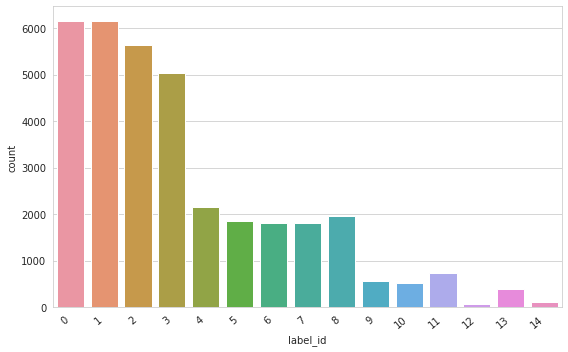

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# Convert text features to numeric using TF-IDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()
cv2 = TfidfVectorizer(sublinear_tf= True, norm='l2', ngram_range=(1, 2), stop_words='english')
#sublinear_tf= True, norm='l2', ngram_range=(1, 2), stop_words='english'
#X_traincv = cv1.fit_transform(X_train['text'])
#X_testcv = cv1.transform(X_test['text'])
X_traincv = cv2.fit_transform(X_train['title_text'])
X_testcv = cv2.transform(X_test['title_text'])
X_traincv.shape

(34911, 759083)

In [ ]:
# Hyperparameter grid RandomizedSearchCV will search over

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = [
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

column_names = ["SGDClassifier"]
entries = []

highest_acc = 0
best_model = None

for model in models:
  print(model["estimater"])

  # Create a based model
  clf = model["estimater"]
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 3, n_jobs = 1)
  # Fit the model
  grid_search.fit(X_traincv, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = grid_search.predict(X_testcv)
  acc = accuracy_score(predicted, y_test)
  entries.append(acc)

  print(grid_search.best_params_)

  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = grid_search


'''
From Previous GridSearch:
MultinomialNB()
{'fit_prior': False}
LinearSVC()
{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 900, 'multi_class': 'crammer_singer', 'random_state': 42}
'''

SGDClassifier()
{'alpha': 0.0001, 'early_stopping': True, 'loss': 'perceptron', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}


"\nMultinomialNB()\n{'fit_prior': False}\nLinearSVC()\n{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 900, 'multi_class': 'crammer_singer', 'random_state': 42}\n"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
classifier = MultinomialNB(fit_prior=False)
classifier.fit(X_traincv, y_train)
y_pred = classifier.predict(X_testcv)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[1332  107   18    8    0    3    0    2   11    0    0    0    0    0
     0]
 [  27 1489   13   30    2    1    0    1    1    0    0    0    0    0
     0]
 [  14   71 1311    4    0    3    1    0    5    0    0    0    0    0
     0]
 [  17  138   12 1043    1    2    3    5   13    0    0    0    0    0
     0]
 [   9   28    3    5   86    1    0    0    6    0    0    0    0    0
     0]
 [   6   30    5    4    1   72    0    0    0    0    0    0    0    0
     0]
 [   4   18    3    7    0    0   79    0    7    0    0    0    0    0
     0]
 [  10   15    3   11    5    1    0   69    2    0    0    0    0    0
     0]
 [   7   49    1    2    0    0    0    0   72    0    0    0    0    0
     0]
 [  10   22    0    2    0    0    0    0    0    3    0    0    0    0
     0]
 [  13    9    2    5    0    2    0    0    1    0    1    0    0    0
     0]
 [   3   59    0    1    0    0    0    0    1    0    0    0    0    0
     0]
 [   0    4    0    0    0    0    0    

In [ ]:
classifier = SGDClassifier(alpha= 0.0001, early_stopping= True, loss= 'perceptron', max_iter=1000, penalty= 'l2', random_state= 42)
classifier.fit(X_traincv, y_train)
y_pred = classifier.predict(X_testcv)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[1347   54   17   12    9    9    3   12   13    1    2    1    0    1
     0]
 [  36 1430   16   29    8    8    1    9   11    4    1    6    0    5
     0]
 [  10   14 1364    6    4    3    2    1    2    0    1    2    0    0
     0]
 [  17   45    7 1122    5    1    7    7   12    0    1    3    0    7
     0]
 [   2    4    3    3  114    1    0    2    7    1    0    1    0    0
     0]
 [   5    5    4    3    1   98    1    1    0    0    0    0    0    0
     0]
 [   4    0    1    5    0    0  102    2    4    0    0    0    0    0
     0]
 [   3    0    2    4    1    0    1  103    1    0    1    0    0    0
     0]
 [   4   12    2    4    4    1    3    2   95    0    0    2    0    2
     0]
 [   2    3    0    0    1    0    0    0    0   31    0    0    0    0
     0]
 [   3    1    0    7    1    3    0    2    1    0   14    1    0    0
     0]
 [   4   30    3    5    0    4    0    2    2    0    1   12    0    1
     0]
 [   0    1    0    1    0    0    0    

In [ ]:
classifier = LinearSVC(fit_intercept= True, loss= 'hinge', max_iter= 900, multi_class= 'crammer_singer', random_state= 42)
classifier.fit(X_traincv, y_train)
y_pred = classifier.predict(X_testcv)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[1365   58   13    6    6   11    1    5   11    2    1    2    0    0
     0]
 [  33 1461   11   25    3    7    1    6    9    4    2    1    0    1
     0]
 [   8   13 1378    1    1    3    1    1    2    0    1    0    0    0
     0]
 [  11   42    3 1139    5    2    8    6   14    1    0    1    0    2
     0]
 [   3    3    2    2  120    2    0    0    5    0    0    1    0    0
     0]
 [   4    5    4    3    1  100    0    1    0    0    0    0    0    0
     0]
 [   2    2    0    6    0    1  104    0    3    0    0    0    0    0
     0]
 [   1    0    1    2    4    1    1  103    3    0    0    0    0    0
     0]
 [   3    9    1    7    2    0    1    0  106    0    0    1    0    1
     0]
 [   2    3    0    0    0    0    0    0    0   32    0    0    0    0
     0]
 [   4    2    1    8    0    3    0    1    0    0   14    0    0    0
     0]
 [   5   34    1    4    0    4    0    1    4    0    1   10    0    0
     0]
 [   0    2    0    1    0    0    0    

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
